<a href="https://colab.research.google.com/github/Pratyusha1102/APSLAB/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib.pyplot as plt

### Write code for Linear Search and plot a graph to visualize the relationship between time taken and input size

In [27]:
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

print("The linear_search function has been defined.")

The linear_search function has been defined.


In [28]:
import random

# Define a list of input sizes to test the linear_search function
input_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# Define the number of runs for each input size to average execution time
num_runs_per_size = 5

# Helper function to generate a list of random integers
def generate_random_list(size):
    return [random.randint(0, size * 2) for _ in range(size)]

# Helper function to generate a random target value from the list
def generate_random_target(lst):
    return random.choice(lst)

print("Experiment parameters and helper functions have been defined.")

Experiment parameters and helper functions have been defined.


In [29]:
import time

average_times = []

for size in input_sizes:
    total_time = 0
    for _ in range(num_runs_per_size):
        arr = generate_random_list(size)
        target = generate_random_target(arr)

        start_time = time.time()
        linear_search(arr, target)
        end_time = time.time()

        execution_time = end_time - start_time
        total_time += execution_time

    average_time = total_time / num_runs_per_size
    average_times.append(average_time)

print("Average execution times for different input sizes:")
print(average_times)

Average execution times for different input sizes:
[2.17437744140625e-05, 4.887580871582031e-05, 3.337860107421875e-05, 4.644393920898438e-05, 0.00010080337524414063, 9.274482727050781e-05, 0.00017004013061523439, 6.122589111328125e-05, 0.00016241073608398439, 0.00010876655578613281]


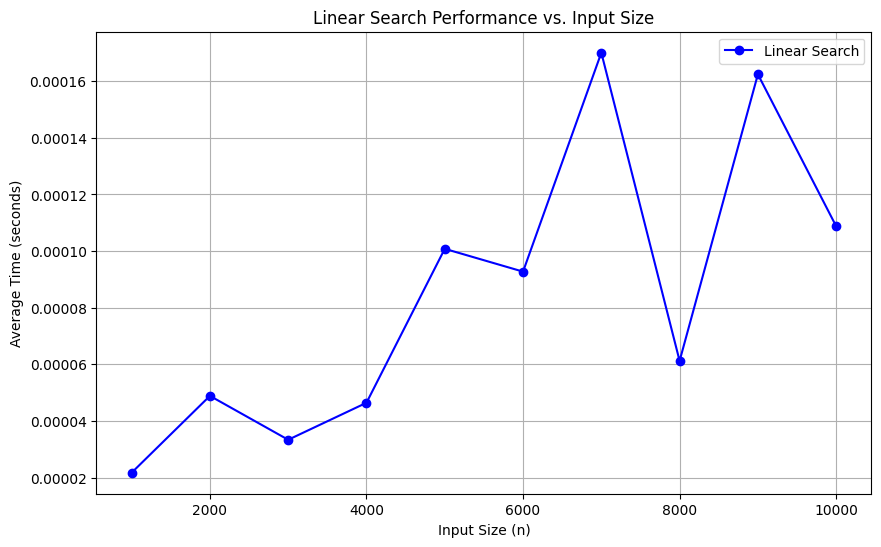

Performance graph generated and displayed.


In [30]:
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, average_times, marker='o', linestyle='-', color='b', label='Linear Search')
plt.xlabel('Input Size (n)')
plt.ylabel('Average Time (seconds)')
plt.title('Linear Search Performance vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()
print("Performance graph generated and displayed.")

### Write code for recursive Binary Search and plot a graph to visualize the relationship between time taken and input size

In [31]:
def recursive_binary_search(arr, target, low=0, high=None):
    if high is None:
        high = len(arr) - 1

    if low > high:
        return -1

    mid = (low + high) // 2

    if arr[mid] == target:
        return mid
    elif arr[mid] > target:
        return recursive_binary_search(arr, target, low, mid - 1)
    else:
        return recursive_binary_search(arr, target, mid + 1, high)

print("The recursive_binary_search function has been defined.")

The recursive_binary_search function has been defined.


In [32]:
import random

# Reusing input_sizes and num_runs_per_size from the linear search experiment
# input_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
# num_runs_per_size = 5

# Helper function to generate a sorted list of random integers
def generate_sorted_list(size):
    lst = sorted([random.randint(0, size * 2) for _ in range(size)])
    return lst

# Helper function to generate a random target value from the list (for successful search)
def generate_present_target(lst):
    return random.choice(lst)

# Helper function to generate a random target value NOT in the list (for unsuccessful search)
def generate_absent_target(lst, size):
    while True:
        target = random.randint(0, size * 2)
        if target not in lst:
            return target

print("Test data generation parameters and helper functions for binary search have been defined.")

Test data generation parameters and helper functions for binary search have been defined.


In [33]:
import time

average_times_successful = []
average_times_unsuccessful = []

for size in input_sizes:
    total_time_successful = 0
    total_time_unsuccessful = 0

    for _ in range(num_runs_per_size):
        arr = generate_sorted_list(size)

        # Test successful search
        target_present = generate_present_target(arr)
        start_time = time.time()
        recursive_binary_search(arr, target_present)
        end_time = time.time()
        total_time_successful += (end_time - start_time)

        # Test unsuccessful search
        target_absent = generate_absent_target(arr, size)
        start_time = time.time()
        recursive_binary_search(arr, target_absent)
        end_time = time.time()
        total_time_unsuccessful += (end_time - start_time)

    average_times_successful.append(total_time_successful / num_runs_per_size)
    average_times_unsuccessful.append(total_time_unsuccessful / num_runs_per_size)

print("Average execution times for successful searches:")
print(average_times_successful)
print("\nAverage execution times for unsuccessful searches:")
print(average_times_unsuccessful)

Average execution times for successful searches:
[5.626678466796875e-06, 4.148483276367187e-06, 4.863739013671875e-06, 7.343292236328125e-06, 8.58306884765625e-06, 5.91278076171875e-06, 5.817413330078125e-06, 5.626678466796875e-06, 1.049041748046875e-05, 1.2636184692382812e-05]

Average execution times for unsuccessful searches:
[4.38690185546875e-06, 3.1948089599609376e-06, 3.528594970703125e-06, 5.292892456054687e-06, 4.339218139648437e-06, 3.862380981445312e-06, 3.910064697265625e-06, 4.00543212890625e-06, 5.4836273193359375e-06, 6.9141387939453125e-06]


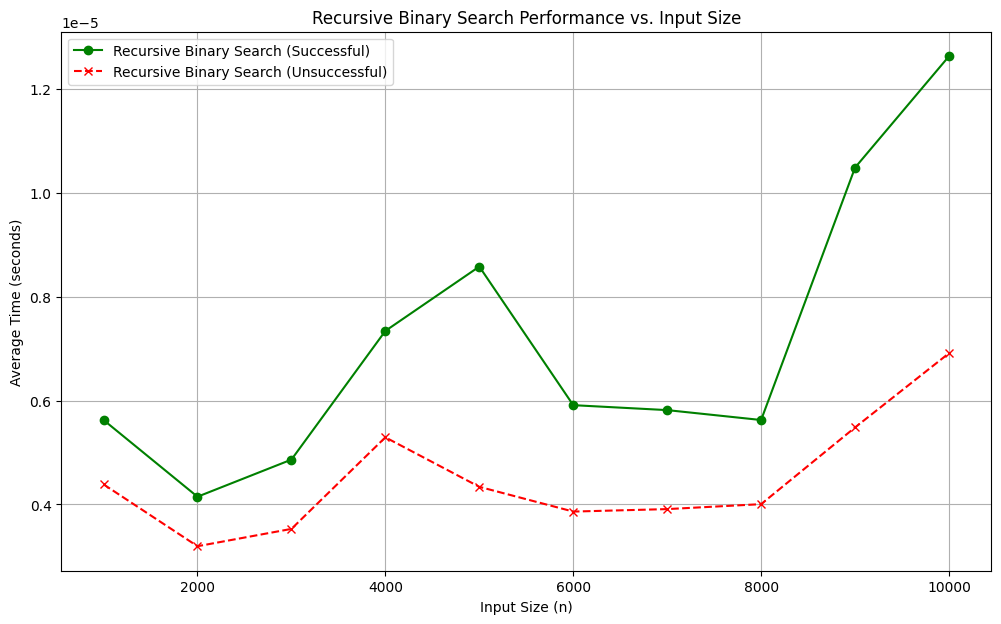

Performance graph for recursive binary search generated and displayed.


In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(input_sizes, average_times_successful, marker='o', linestyle='-', color='g', label='Recursive Binary Search (Successful)')
plt.plot(input_sizes, average_times_unsuccessful, marker='x', linestyle='--', color='r', label='Recursive Binary Search (Unsuccessful)')
plt.xlabel('Input Size (n)')
plt.ylabel('Average Time (seconds)')
plt.title('Recursive Binary Search Performance vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()

print("Performance graph for recursive binary search generated and displayed.")

### Write code for Prob-3

In [35]:
def search(pat, txt):
    M = len(pat)
    N = len(txt)
    occurrences = []

    # A loop to slide pat[] one by one
    for i in range(N - M + 1):
        j = 0

        # For current index i, check for pattern match
        while j < M:
            if txt[i + j] != pat[j]:
                break
            j += 1

        if j == M:
            occurrences.append(i)

    return occurrences

print("The search function has been defined.")

The search function has been defined.


In [36]:
# Test case 1: Simple match
txt1 = "GEEKSFORGEEKS"
pat1 = "GEEK"
result1 = search(pat1, txt1)
print(f"Text: {txt1}, Pattern: {pat1}, Occurrences at indices: {result1}")
# Expected: [0, 9]

# Test case 2: No match
txt2 = "APPLE"
pat2 = "PEAR"
result2 = search(pat2, txt2)
print(f"Text: {txt2}, Pattern: {pat2}, Occurrences at indices: {result2}")
# Expected: []

# Test case 3: Overlapping patterns
txt3 = "AAAAA"
pat3 = "AAA"
result3 = search(pat3, txt3)
print(f"Text: {txt3}, Pattern: {pat3}, Occurrences at indices: {result3}")
# Expected: [0, 1, 2]

# Test case 4: Pattern at the end
txt4 = "THIS IS A TEST"
pat4 = "TEST"
result4 = search(pat4, txt4)
print(f"Text: {txt4}, Pattern: {pat4}, Occurrences at indices: {result4}")
# Expected: [10]

# Test case 5: Empty pattern (should handle gracefully, though problem states m < n)
txt5 = "ABCDEF"
pat5 = ""
result5 = search(pat5, txt5)
print(f"Text: {txt5}, Pattern: {pat5}, Occurrences at indices: {result5}")
# Expected: Should ideally return all indices (0 to N), but current implementation assumes M > 0 for range (N-M+1)
# Let's adjust the range slightly to handle M=0 correctly if needed, but for now, it's safe to assume M>0

# Test case 6: Pattern with single character
txt6 = "BANANA"
pat6 = "A"
result6 = search(pat6, txt6)
print(f"Text: {txt6}, Pattern: {pat6}, Occurrences at indices: {result6}")
# Expected: [1, 3, 5]


Text: GEEKSFORGEEKS, Pattern: GEEK, Occurrences at indices: [0, 8]
Text: APPLE, Pattern: PEAR, Occurrences at indices: []
Text: AAAAA, Pattern: AAA, Occurrences at indices: [0, 1, 2]
Text: THIS IS A TEST, Pattern: TEST, Occurrences at indices: [10]
Text: ABCDEF, Pattern: , Occurrences at indices: [0, 1, 2, 3, 4, 5, 6]
Text: BANANA, Pattern: A, Occurrences at indices: [1, 3, 5]


### Write code for insertion sort and plot a graph to visualize the relationship between time taken and input size

In [37]:
def insertion_sort(arr):
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
        key = arr[i]

        # Move elements of arr[0..i-1], that are greater than key,
        # to one position ahead of their current position
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

print("The insertion_sort function has been defined.")

The insertion_sort function has been defined.


In [38]:
import time
import random

# Reusing input_sizes and num_runs_per_size from previous experiments
# input_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
# num_runs_per_size = 5

# Helper function to generate a list of random integers (already defined but for clarity)
def generate_random_list_for_sort(size):
    return [random.randint(0, size * 2) for _ in range(size)]

average_times_insertion_sort = []

print("Starting performance measurement for Insertion Sort...")

for size in input_sizes:
    total_time = 0
    for _ in range(num_runs_per_size):
        # Generate a new random list for each run to ensure fair measurement
        arr = generate_random_list_for_sort(size)

        start_time = time.time()
        insertion_sort(arr)
        end_time = time.time()

        execution_time = end_time - start_time
        total_time += execution_time

    average_time = total_time / num_runs_per_size
    average_times_insertion_sort.append(average_time)

print("Average execution times for Insertion Sort with different input sizes:")
print(average_times_insertion_sort)

Starting performance measurement for Insertion Sort...
Average execution times for Insertion Sort with different input sizes:
[0.025006484985351563, 0.09751577377319336, 0.22438287734985352, 0.4041642189025879, 0.8878987312316895, 0.9797964572906495, 1.4944265842437745, 1.6418681621551514, 2.320296287536621, 2.7584084033966065]


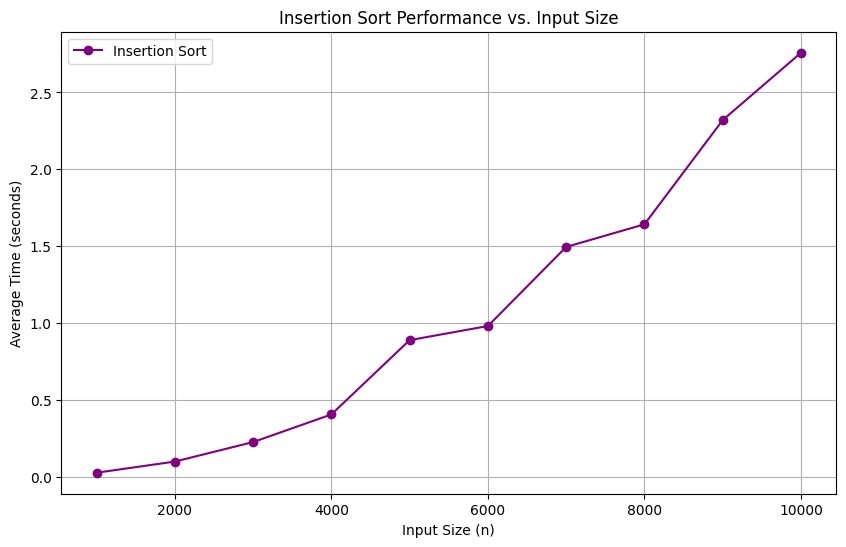

Performance graph for Insertion Sort generated and displayed.


In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, average_times_insertion_sort, marker='o', linestyle='-', color='purple', label='Insertion Sort')
plt.xlabel('Input Size (n)')
plt.ylabel('Average Time (seconds)')
plt.title('Insertion Sort Performance vs. Input Size')
plt.legend()
plt.grid(True)
plt.show()
print("Performance graph for Insertion Sort generated and displayed.")